# Total Solar Irradiance Calibration Transfer Experiment(TCTE) & Solar Radiation and Climate Experiment(SORCE) Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc

In [2]:
data_tcte = pd.read_csv('/Users/shreysharma/Downloads/tcte_tsi_24hr.csv')
data_sorce = pd.read_csv('/Users/shreysharma/Downloads/sorce_tsi_24hr_l3.csv')

In [3]:
data_tcte = data_tcte.set_index(data_tcte.columns[0])
data_sorce = data_sorce.set_index(data_sorce.columns[0])

In [4]:
#tcte data
data_tcte['date'] = pd.to_datetime(data_tcte.index,format = '%Y-%m-%dT%H:%M:%S', 
 errors = 'coerce')
data_tcte['year'] = data_tcte['date'].dt.year
data_tcte['month'] = data_tcte['date'].dt.month
data_tcte['day'] = data_tcte['date'].dt.day
data_tcte['hrs'] = data_tcte['date'].dt.hour
data_tcte['minutes'] = data_tcte['date'].dt.minute

In [5]:
d1 = data_tcte[(data_tcte['year']==2018) & (data_tcte['month']==1)]

### Converting Julian date to Calender date

In [6]:
import datetime
import julian
#sorce data
time=[]
for dt in data_sorce.index:
    date = julian.from_jd(dt)
    time.append(date)

data_sorce['date']=time

In [7]:
data_sorce['date'] = pd.to_datetime(data_sorce['date'],format = '%Y-%m-%d', 
 errors = 'coerce')
data_sorce['year'] = data_sorce['date'].dt.year
data_sorce['month'] = data_sorce['date'].dt.month
data_sorce['day'] = data_sorce['date'].dt.day
data_sorce['hrs'] = data_sorce['date'].dt.hour
data_sorce['minutes'] = data_sorce['date'].dt.minute

In [8]:
data_tcte.describe()

,tsi_1au (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days),year,month,day,hrs,minutes
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.00000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2.028000e+03,2028.000000,2028.000000,2028.000000,2028.000000,2028.0,2028.0
mean,1107.747325,0.498485,0.005533,0.051478,0.50148,1108.201980,0.498691,0.005533,0.110393,0.513374,2.457653e+06,0.187112,2016.242604,6.306213,15.761341,12.0,0.0
std,530.336906,0.238651,0.002649,0.032287,0.24011,531.323674,0.239096,0.002649,0.079214,0.246505,5.855820e+02,0.115968,1.624407,3.467009,8.798531,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.456640e+06,0.000000,2013.000000,1.000000,1.000000,12.0,0.0
25%,1361.123450,0.612500,0.006800,0.042508,0.61410,1318.558900,0.593375,0.006800,0.051535,0.598175,2.457147e+06,0.026675,2015.000000,3.000000,8.000000,12.0,0.0
50%,1361.293450,0.612600,0.006800,0.053405,0.61500,1346.292050,0.605850,0.006800,0.107650,0.627150,2.457653e+06,0.266350,2016.000000,6.000000,16.000000,12.0,0.0
75%,1361.706950,0.612800,0.006800,0.066540,0.61630,1386.953350,0.624125,0.006800,0.173950,0.641400,2.458160e+06,0.267800,2018.000000,9.000000,23.000000,12.0,0.0
max,1362.796400,0.613300,0.006800,0.336100,0.69870,1409.129200,0.634100,0.006800,0.390400,0.727400,2.458667e+06,0.426000,2019.000000,12.000000,31.000000,12.0,0.0


Text(0.5, 1.0, 'TSI values- Calibration Transfer Experiment, for January 2018')

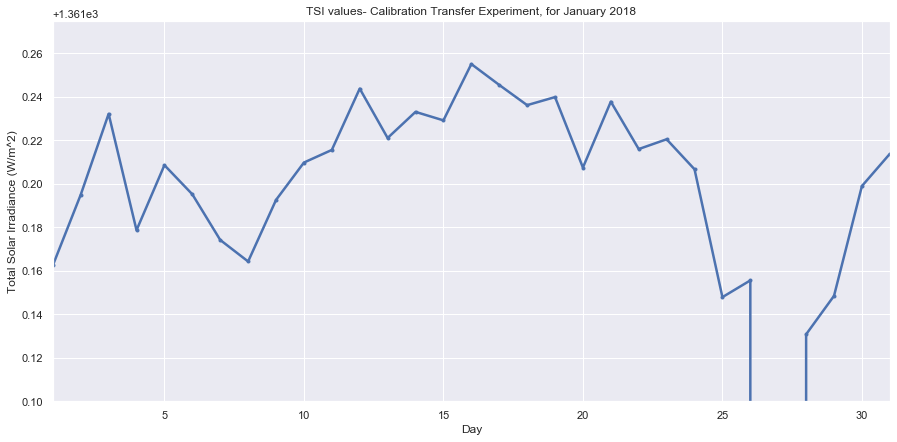

In [336]:
plt.figure(figsize=(15,7)) 
plt.axis([1,31,1361.1,1361.275])
plt.plot(d1['day'],d1['tsi_1au (W/m^2)'],marker='.',linewidth=2.5)
plt.xlabel('Day')
plt.ylabel('Total Solar Irradiance (W/m^2)')
plt.title('TSI values- Calibration Transfer Experiment, for January 2018')

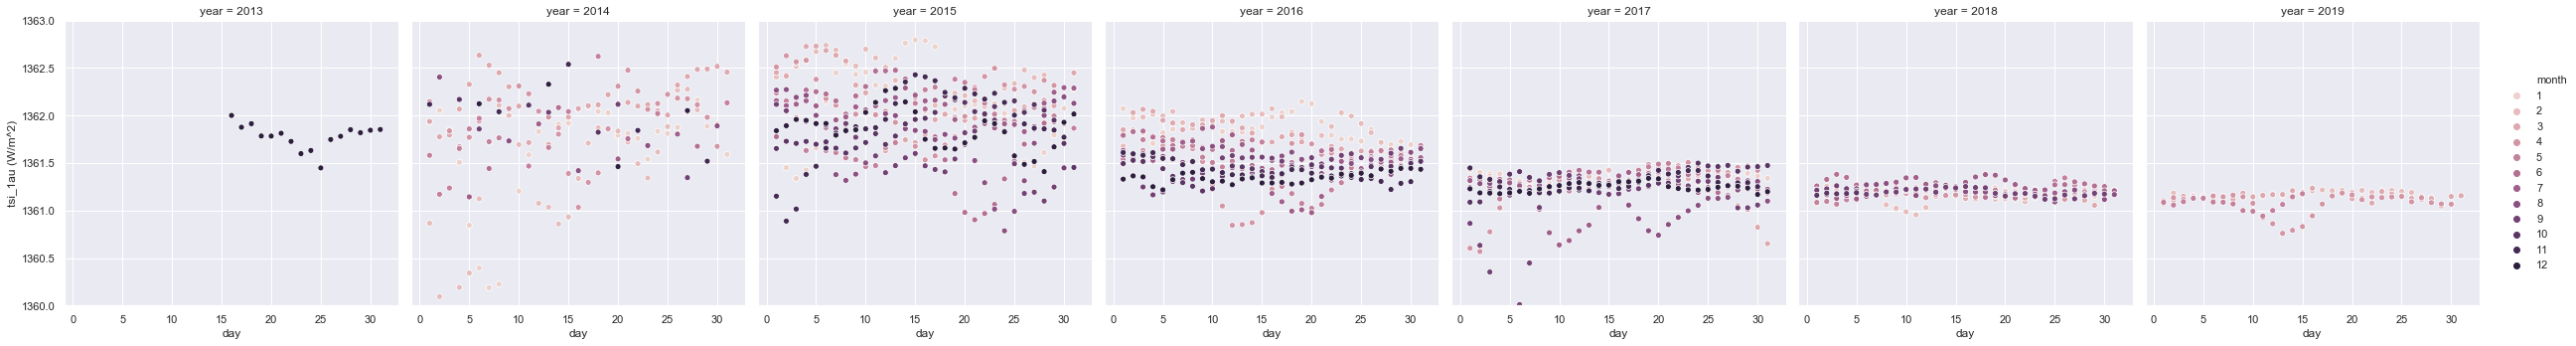

In [14]:
sns.set(rc={'figure.figsize':(500,100)})
g = sns.relplot(x='day', y='tsi_1au (W/m^2)', hue='month', data=data_tcte,col='year',
               legend='full')
g.set(ylim=(1360,1363))

In [9]:
d2 = data_sorce[(data_sorce['year']==2019) & (data_sorce.month==1)]

Text(0.5, 1.0, 'Solar Radiation And Climate Experiment, for January 2019')

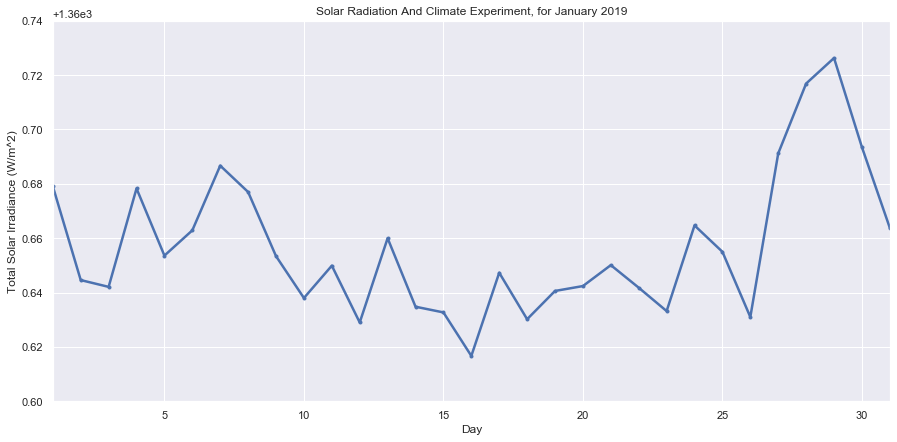

In [339]:
plt.figure(figsize=(15,7)) 
plt.axis([1,31,1360.6,1360.74])
plt.plot(d2['day'],d2['tsi_1au (W/m^2)'],marker='.',linewidth=2.5)
plt.xlabel('Day')
plt.ylabel('Total Solar Irradiance (W/m^2)')
plt.title('Solar Radiation And Climate Experiment, for January 2019')

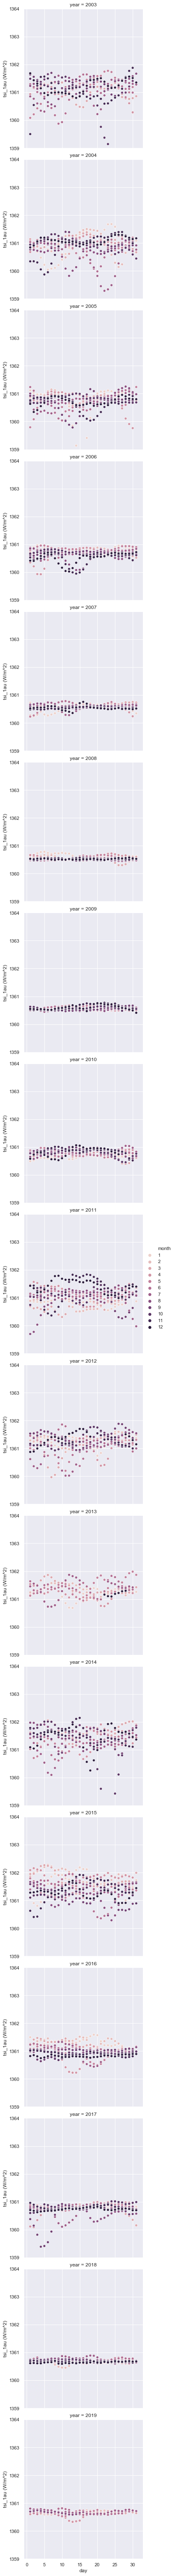

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize':(500,100)})
g = sns.relplot(x='day', y='tsi_1au (W/m^2)', hue='month', data=data_sorce,row='year',
               legend='full')
g.set(ylim=(1359,1364))

### ADF Test for time series stationarity

In [10]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

### TCTE data

In [11]:
adfuller_test(data_tcte['tsi_1au (W/m^2)'], name='TSI')
print('\n')

    Augmented Dickey-Fuller Test on "TSI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6122
 No. Lags Chosen       = 22
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0905. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [14]:
from math import sqrt
#making series stationary
data_tcte['tsi_1au (W/m^2)_diff'] = data_tcte['tsi_1au (W/m^2)'].diff()
data_tcte.dropna(inplace=True)

In [18]:
data_tcte.head()

,tsi_1au (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days),date,year,month,day,hrs,minutes,tsi_1au (W/m^2)_diff
time (yyyy-MM-dd'T'HH:mm:ss.SSS),,,,,,,,,,,,,,,,,,,
2013-12-14T12:00:00.000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,2.456641e+06,0.0000,2013-12-14 12:00:00,2013,12,14,12,0,0.0000
2013-12-15T12:00:00.000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,2.456642e+06,0.0000,2013-12-15 12:00:00,2013,12,15,12,0,0.0000
2013-12-16T12:00:00.000,1362.0017,0.6129,0.0068,0.03059,0.6137,1406.4537,0.6329,0.0068,0.03165,0.6337,2.456643e+06,0.0089,2013-12-16 12:00:00,2013,12,16,12,0,1362.0017
2013-12-17T12:00:00.000,1361.8773,0.6128,0.0068,0.03968,0.6141,1406.5688,0.6330,0.0068,0.04106,0.6343,2.456644e+06,0.0089,2013-12-17 12:00:00,2013,12,17,12,0,-0.1244
2013-12-18T12:00:00.000,1361.9147,0.6129,0.0068,0.06651,0.6165,1406.7606,0.6330,0.0068,0.06856,0.6367,2.456645e+06,0.0089,2013-12-18 12:00:00,2013,12,18,12,0,0.0374


In [16]:
adfuller_test(data_tcte['tsi_1au (W/m^2)_diff'], name='TSI')
print('\n')

    Augmented Dickey-Fuller Test on "TSI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1561
 No. Lags Chosen       = 26
 Critical value 1%     = -3.434
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




### SORCE data

In [210]:
data_sorce.head(3)

,tsi_1au (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days),year,month,day,hrs,minutes
date,,,,,,,,,,,,,,,,,
2003-02-25 12:00:00,1361.4919,0.4765,0.0068,0.03297,0.4777,1389.2020,0.4862,0.0068,0.03385,0.4874,2.452696e+06,0.0029,2003,2,25,12,0
2003-02-26 12:00:00,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,2.452697e+06,0.0000,2003,2,26,12,0
2003-02-27 12:00:00,1361.4594,0.4765,0.0068,0.05238,0.4794,1388.0933,0.4858,0.0068,0.09313,0.4947,2.452698e+06,0.0769,2003,2,27,12,0


In [70]:
adfuller_test(data_sorce['tsi_1au (W/m^2)'], name='TSI')
print('\n')

    Augmented Dickey-Fuller Test on "TSI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5328
 No. Lags Chosen       = 31
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.




## Applying Machine Learning Algorithms

### 1. TCTE data

#### Spliting the data into train and test

In [178]:
train_size = int(len(data_tcte) * 0.8)
test_size = len(data_tcte) - train_size
train, test = data_tcte[0:train_size], data_tcte.iloc[train_size:len(data_tcte)]
print(len(train), len(test))

1621 406


#### 1.1 ARIMA

In [226]:
model_autoARIMA = auto_arima(train['tsi_1au (W/m^2)_diff'], start_p=0, start_q=0,      
                      test='adf'       ,# using adftest to find optimal 'd'
                      max_p=5, max_q=5,# maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23257.062, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=22754.685, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=22278.228, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22273.972, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22274.116, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=22231.311, Time=0.49 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=22273.353, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22213.816, Time=1.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=22144.612, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=22257.491, Time=0.28 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=22123.790, Time=0.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=22223.555, Time=0.35 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=21842.024, Time=1.09 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=22158.380, Time=0.50 sec
 ARIMA(5,0,3)(0,0,0

In [199]:
history = [x for x in train['tsi_1au (W/m^2)_diff']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['tsi_1au (W/m^2)_diff'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=2.292997, expected=0.023600
predicted=2.269303, expected=-0.021200
predicted=2.276863, expected=0.114900
predicted=2.181540, expected=0.034700
predicted=2.145060, expected=-0.074700
predicted=2.229988, expected=-0.073400
predicted=2.277840, expected=-0.007000
predicted=2.320544, expected=0.042800
predicted=2.272457, expected=-0.046300
predicted=2.319785, expected=0.073400
predicted=2.230099, expected=0.069300
predicted=2.174225, expected=0.053100
predicted=2.130959, expected=-0.032100
predicted=2.153223, expected=-0.080100
predicted=2.246617, expected=-0.061900
predicted=2.305005, expected=0.005600
predicted=2.320683, expected=-0.005500
predicted=2.313919, expected=-0.012600
predicted=2.319347, expected=0.016100
predicted=2.281093, expected=0.019100
predicted=2.264752, expected=0.042600
predicted=2.211136, expected=0.020500
predicted=2.193964, expected=-0.033600
predicted=2.219462, expected=-0.012200
predicted=2.234299, expected=-0.047300
predicted=2.279927, expected=0.029800

predicted=-1.900727, expected=0.000000
predicted=-1.904195, expected=0.000000
predicted=-1.898927, expected=0.000000
predicted=-1.901675, expected=0.000000
predicted=-1.897524, expected=0.000000
predicted=-1.898886, expected=0.000000
predicted=-1.896254, expected=0.000000
predicted=-1.896709, expected=0.000000
predicted=-1.894270, expected=0.000000
predicted=-1.894862, expected=0.000000
predicted=-1.892036, expected=0.000000
predicted=-1.891664, expected=0.000000
predicted=-1.890056, expected=0.000000
predicted=-1.890148, expected=0.000000
predicted=-1.888782, expected=0.000000
predicted=-1.888600, expected=0.000000
predicted=-1.886794, expected=0.000000
predicted=-1.885853, expected=0.000000
predicted=-1.884028, expected=0.000000
predicted=-1.884306, expected=0.000000
predicted=-1.882457, expected=0.000000
predicted=-1.881342, expected=0.000000
predicted=-1.881152, expected=0.000000
predicted=-1.879697, expected=0.000000
predicted=-1.878214, expected=0.000000
predicted=-1.877552, expe

In [200]:
test['tsi_pred']= predictions

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


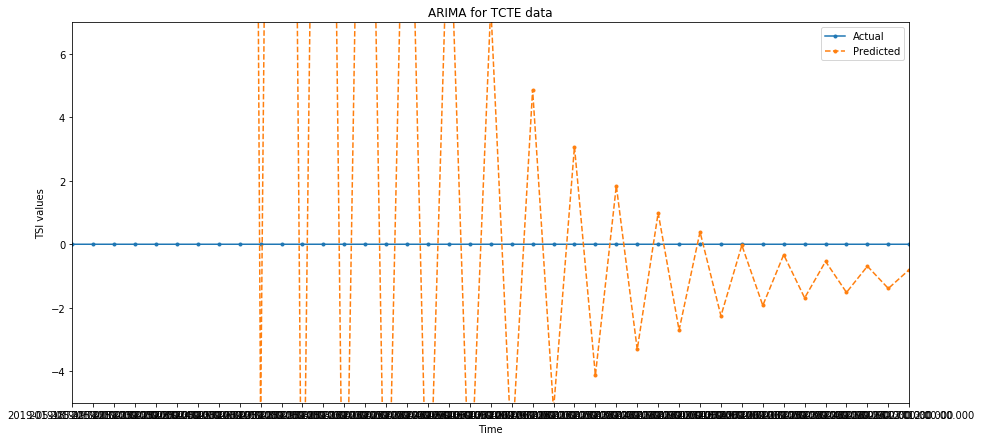

In [237]:
#plotting
plt.figure(figsize=(15,7))
plt.axis([360,400,-5,7])
plt.plot(test['tsi_1au (W/m^2)'],label='Actual',marker='.')
plt.plot(test['tsi_pred'],label='Predicted',marker='.',linestyle='dashed')
plt.title('ARIMA for TCTE data')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [229]:
from math import sqrt
error = sqrt(mean_squared_error(test['tsi_1au (W/m^2)_diff'], predictions))
print('Test RMSE: %.3f' % error)

Test RMSE: 232.572


#### 1.2 LSTM

In [183]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [184]:
# choose a number of time steps
n_steps = 10
# split into samples
train_X,train_y = split_sequence(data_tcte['tsi_1au (W/m^2)_diff'], n_steps)
test_X,test_y = split_sequence(test['tsi_1au (W/m^2)_diff'],n_steps)
print(train_X[0:5])
print(test_X[0:5])

[[ 0.0000000e+00  0.0000000e+00  1.3620017e+03 -1.2440000e-01
   3.7400000e-02 -1.2960000e-01 -9.0000000e-04  2.9500000e-02
  -8.5600000e-02 -1.2880000e-01]
 [ 0.0000000e+00  1.3620017e+03 -1.2440000e-01  3.7400000e-02
  -1.2960000e-01 -9.0000000e-04  2.9500000e-02 -8.5600000e-02
  -1.2880000e-01  3.3100000e-02]
 [ 1.3620017e+03 -1.2440000e-01  3.7400000e-02 -1.2960000e-01
  -9.0000000e-04  2.9500000e-02 -8.5600000e-02 -1.2880000e-01
   3.3100000e-02 -1.8360000e-01]
 [-1.2440000e-01  3.7400000e-02 -1.2960000e-01 -9.0000000e-04
   2.9500000e-02 -8.5600000e-02 -1.2880000e-01  3.3100000e-02
  -1.8360000e-01  2.9930000e-01]
 [ 3.7400000e-02 -1.2960000e-01 -9.0000000e-04  2.9500000e-02
  -8.5600000e-02 -1.2880000e-01  3.3100000e-02 -1.8360000e-01
   2.9930000e-01  3.4000000e-02]]
[[ 0.0236 -0.0212  0.1149  0.0347 -0.0747 -0.0734 -0.007   0.0428 -0.0463
   0.0734]
 [-0.0212  0.1149  0.0347 -0.0747 -0.0734 -0.007   0.0428 -0.0463  0.0734
   0.0693]
 [ 0.1149  0.0347 -0.0747 -0.0734 -0.007   0

In [97]:
n_features=1
# define model
model =keras.Sequential()
model.add(keras.layers.LSTM(units=64, activation='relu', input_shape=(n_steps, n_features)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [98]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# fit model
model.fit(train_X, train_y, epochs=30, verbose=0)
# demonstrate prediction
test_X = test_X.reshape((len(test_X), n_steps, n_features))
yhat = model.predict(test_X, verbose=0)

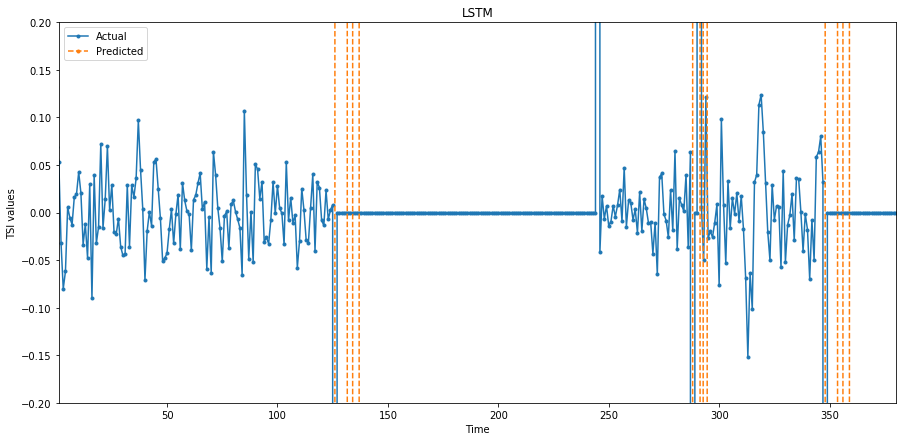

In [119]:
#plotting
plt.figure(figsize=(15,7))
plt.axis([1,380,-0.2,0.2])
plt.plot(test_y,label='Actual',marker='.')
plt.plot(yhat,label='Predicted',marker='.',linestyle='dashed')
plt.title('LSTM')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [99]:
rmse_lstm = sqrt(mean_squared_error(test_y,yhat))
print(f'The RMSE for LSTM is {rmse_lstm}')

The RMSE for LSTM is 154.4939881261379


#### 1.3 AR Model

In [239]:
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
# split dataset
X = data_tcte['tsi_1au (W/m^2)_diff'].values
train1, test1 = X[0:train_size], X[train_size:len(X)]

# train autoregression
model = AutoReg(train1, lags=15)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train1),end=len(train1)+len(test1)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test1[i]))


Coefficients: [-0.00680428 -0.94095758 -0.74400922 -0.61808676 -0.52245508 -0.39119044
 -0.35654281  0.20241881  0.20001019  0.08672113 -0.01842255 -0.07031322
 -0.18099238 -0.14720274  0.09849174  0.0550929 ]
predicted=0.009574, expected=0.023600
predicted=-0.007719, expected=-0.021200
predicted=0.014390, expected=0.114900
predicted=-0.016799, expected=0.034700
predicted=-0.017695, expected=-0.074700
predicted=0.014230, expected=-0.073400
predicted=-0.005522, expected=-0.007000
predicted=0.003913, expected=0.042800
predicted=-0.001385, expected=-0.046300
predicted=0.012897, expected=0.073400
predicted=-0.016155, expected=0.069300
predicted=-0.018315, expected=0.053100
predicted=0.011911, expected=-0.032100
predicted=-0.001779, expected=-0.080100
predicted=0.003016, expected=-0.061900
predicted=-0.002696, expected=0.005600
predicted=0.009731, expected=-0.005500
predicted=-0.014346, expected=-0.012600
predicted=-0.013839, expected=0.016100
predicted=0.009477, expected=0.019100
predicted

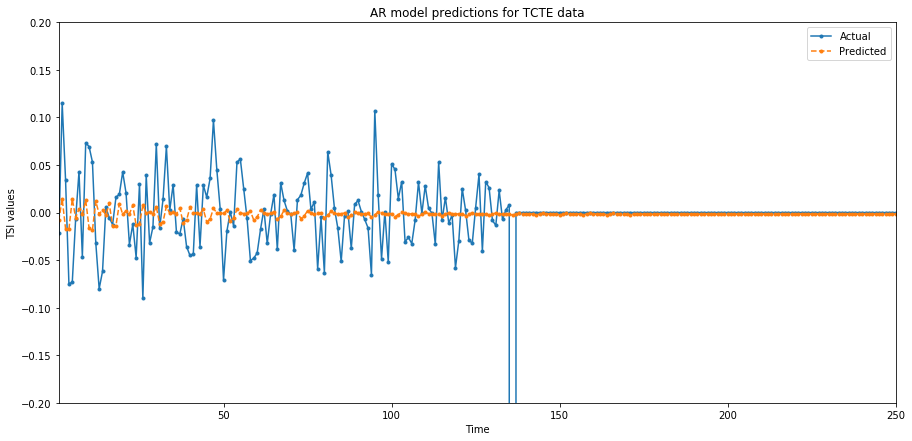

In [249]:
#plotting
plt.figure(figsize=(15,7))
plt.axis([1,250,-0.2,0.2])
plt.plot(test1,label='Actual',marker='.')
plt.plot(predictions,label='Predicted',marker='.',linestyle='dashed')
plt.title('AR model predictions for TCTE data')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [240]:
rmse_ar = sqrt(mean_squared_error(test1, predictions))
print('Test RMSE: %.3f' % rmse_ar)

Test RMSE: 151.056


#### 1.4 VAR 

In [250]:
from statsmodels.tsa.api import VAR
model = VAR(train[['year','month','day','tsi_1au (W/m^2)_diff']])
x = model.select_order(maxlags=15)
x.summary()

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,18.83,18.84,1.499e+08,18.83
1,-1.991,-1.924,0.1366,-1.966
2,-2.082,-1.961,0.1247,-2.037
3,-2.127,-1.953,0.1192,-2.062
4,-2.165,-1.937,0.1147,-2.081
5,-2.177,-1.895,0.1134,-2.072
6,-2.913,-2.578*,0.05430,-2.789*
7,-2.907,-2.518,0.05466,-2.762
8,-2.912,-2.470,0.05437,-2.748
9,-2.924,-2.428,0.05373,-2.740


In [251]:
model_fitted = model.fit(13)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 04, Sep, 2020
Time:                     21:00:25
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -2.26949
Nobs:                     1608.00    HQIC:                  -2.71570
Log likelihood:          -6519.37    FPE:                  0.0508406
AIC:                     -2.97916    Det(Omega_mle):       0.0446556
--------------------------------------------------------------------
Results for equation year
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.942870         2.209934            0.427           0.670
L1.year                          1.633668         3.354782            0.487           0.626
L1.month         

In [252]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input =train[['year','month','day','tsi_1au (W/m^2)_diff']].values[-lag_order:]
#forecast_input

13


In [253]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=test_size)
df_forecast = pd.DataFrame(fc, index=test[['year','month','day','tsi_1au (W/m^2)_diff']].index[-test_size:],columns=['year','month','day','tsi_1au (W/m^2)_diff'])
df_forecast

,year,month,day,tsi_1au (W/m^2)_diff
time (yyyy-MM-dd'T'HH:mm:ss.SSS),,,,
2018-05-23T12:00:00.000,2018.002558,5.029109,21.185714,3.260754
2018-05-24T12:00:00.000,2018.005515,5.057302,20.252719,-0.297918
2018-05-25T12:00:00.000,2018.008691,5.084900,19.257387,0.546921
2018-05-26T12:00:00.000,2018.011914,5.112450,18.246356,1.118319
2018-05-27T12:00:00.000,2018.015093,5.139830,17.255696,0.905067
...,...,...,...,...
2019-06-28T12:00:00.000,2018.950203,7.038088,15.679536,0.823834
2019-06-29T12:00:00.000,2018.952871,7.038972,15.679521,0.824663
2019-06-30T12:00:00.000,2018.955539,7.039855,15.679506,0.825475


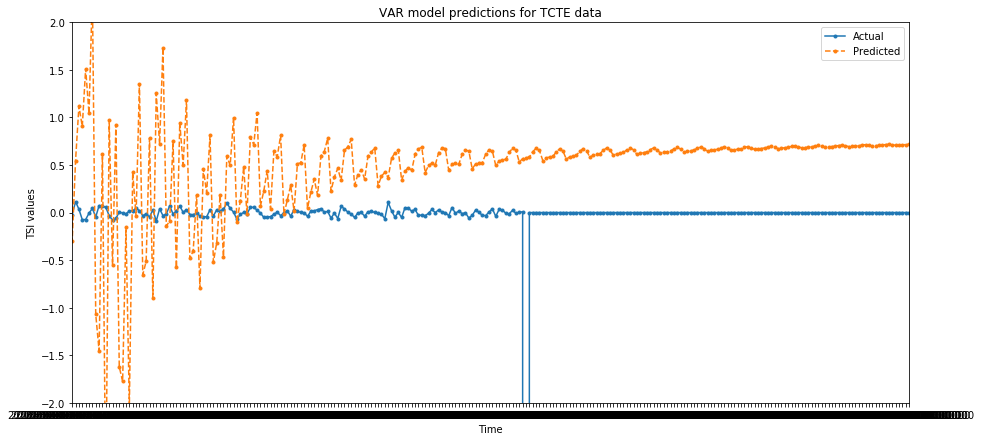

In [260]:
#plotting
plt.figure(figsize=(15,7))
plt.axis([1,250,-2,2])
plt.plot(test['tsi_1au (W/m^2)_diff'],label='Actual',marker='.')
plt.plot(df_forecast['tsi_1au (W/m^2)_diff'],label='Predicted',marker='.',linestyle='dashed')
plt.title('VAR model predictions for TCTE data')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [254]:
#Calculating root mean squared error
rmse_var = sqrt(mean_squared_error(test['tsi_1au (W/m^2)_diff'], df_forecast['tsi_1au (W/m^2)_diff']))
print('RMSE: %f' % rmse_var)

RMSE: 151.072320


#### 1.5 Gaussian Process Regressor (GPR) 

In [261]:
X_train=train[['year','month','day','hrs','minutes']]
y_train= train['tsi_1au (W/m^2)_diff']
X_test = test[['year','month','day','hrs','minutes']]
y_test = test['tsi_1au (W/m^2)_diff']

In [262]:
import sklearn.gaussian_process as gp

kernel = gp.kernels.ConstantKernel(3.0) * gp.kernels.RBF(0.01)

model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=30, alpha=0.1)
model.fit(X_train, y_train)
params = model.kernel_.get_params()

In [263]:
#Predictions
y_pred_gpr = model.predict(X_test)

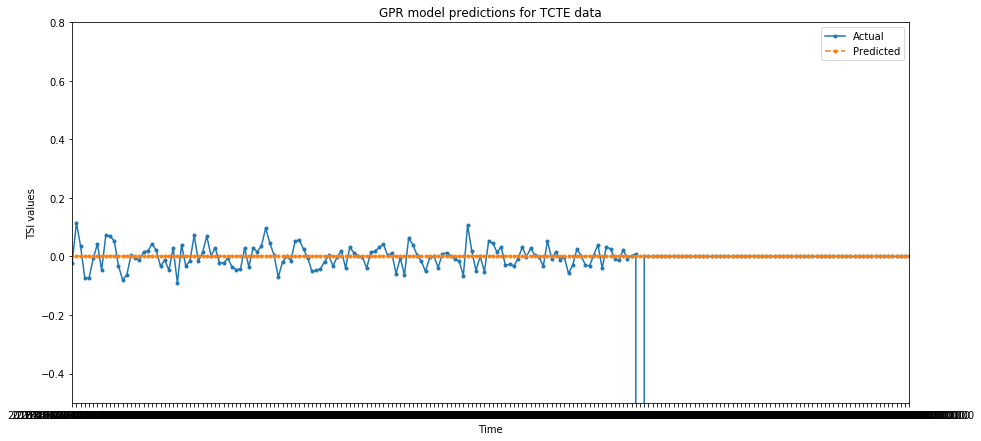

In [269]:
#plotting
plt.figure(figsize=(15,7))
plt.axis([1,200,-0.5,0.8])
plt.plot(y_test,label='Actual',marker='.')
plt.plot(y_pred_gpr,label='Predicted',marker='.',linestyle='dashed')
plt.title('GPR model predictions for TCTE data')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [266]:
RMSE_gpr = sqrt(mean_squared_error(y_test, y_pred_gpr))
RMSE_gpr

151.05600712283706

#### 1.6 Birdirectional LSTM

In [123]:
n_features=1
# Bidirectional LSTM model
model =keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(50), merge_mode='concat', input_shape=(n_steps, n_features)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [124]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# fit model
model.fit(train_X, train_y, epochs=40, verbose=0)
# demonstrate prediction
test_X = test_X.reshape((len(test_X), n_steps, n_features))
yhat = model.predict(test_X, verbose=0)

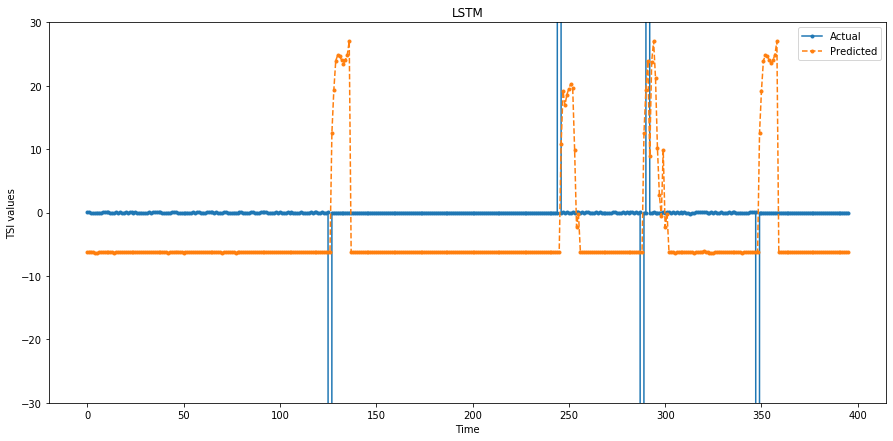

In [125]:
#plotting
plt.figure(figsize=(15,7))
plt.ylim([-30,30])
plt.plot(test_y,label='Actual',marker='.')
plt.plot(yhat,label='Predicted',marker='.',linestyle='dashed')
plt.title('LSTM')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [126]:
rmse_bi_lstm = sqrt(mean_squared_error(test_y,yhat))
print(f'The RMSE for LSTM is {rmse_bi_lstm}')

The RMSE for LSTM is 152.38045330942185


#### 1.7 Cascaded bidirectional and unidirectional based LSTM model

In [244]:
# Cascaded bidirectional and unidirectional model
model =keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(40, input_shape=(n_steps,n_features),return_sequences=True),merge_mode='concat'))
model.add(keras.layers.LSTM(128,input_shape=(n_steps,n_features)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [245]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# fit model
model.fit(train_X, train_y, epochs=60, verbose=0)
# demonstrate prediction
test_X = test_X.reshape((len(test_X), n_steps, n_features))
yhat = model.predict(test_X, verbose=0)

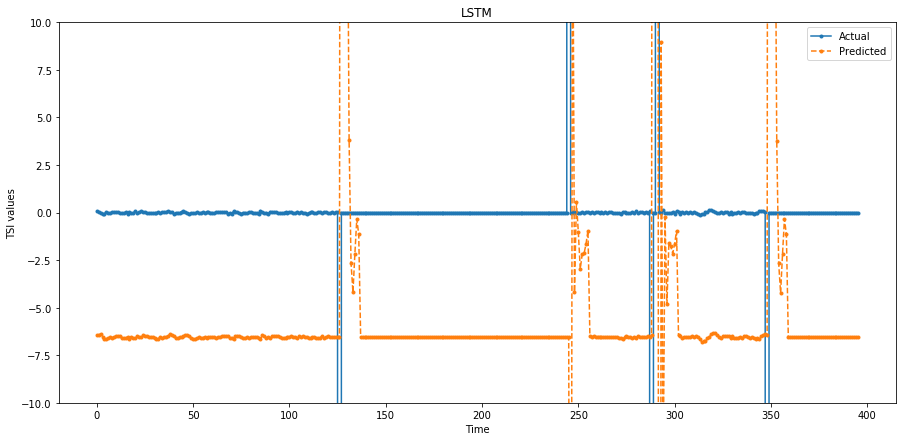

In [248]:
#plotting
plt.figure(figsize=(15,7))
plt.ylim([-10,10])
plt.plot(test_y,label='Actual',marker='.')
plt.plot(yhat,label='Predicted',marker='.',linestyle='dashed')
plt.title('LSTM')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [247]:
rmse_cas_lstm = sqrt(mean_squared_error(test_y,yhat))
print(f'The RMSE for cascaded bidirectional and unidirectinoal LSTM is {rmse_cas_lstm}')

The RMSE for cascaded bidirectional and unidirectinoal LSTM is 151.30457333808602


### 2. SORCE data

In [127]:
data_sorce = data_sorce.set_index(['date'])

In [128]:
train_size1 = int(len(data_sorce) * 0.8)
test_size1 = len(data_sorce) - train_size1
train1, test1 = data_sorce[0:train_size1], data_sorce.iloc[train_size1:len(data_sorce)]
print(len(train1), len(test1))

4812 1204


#### 2.1 ARIMA

In [22]:
model_autoARIMA = auto_arima(train1['tsi_1au (W/m^2)'], start_p=0, start_q=0,      
                      test='adf'       ,# using adftest to find optimal 'd'
                      max_p=3, max_q=3,# maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82797.319, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=76861.795, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=60148.940, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=60150.594, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=60150.712, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=72450.130, Time=1.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=59912.966, Time=1.56 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=59907.701, Time=1.82 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=60155.462, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=60106.977, Time=2.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=59891.721, Time=1.95 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=60141.578, Time=0.64 sec
 ARIMA(2,0,3)(0,0,0)[0] interce

In [275]:
history = [x for x in train1['tsi_1au (W/m^2)']]
prediction = []
for t in range(len(test1.head(400))):
    model = ARIMA(history,order=(2,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test1['tsi_1au (W/m^2)'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=1355.758660, expected=1361.035700
predicted=1355.638812, expected=1360.947000
predicted=1355.578006, expected=1360.963400
predicted=1355.584208, expected=1361.080600
predicted=1355.690796, expected=1361.164900
predicted=1355.762403, expected=1361.206700
predicted=1355.800005, expected=1361.198000
predicted=1355.807636, expected=1361.197500
predicted=1355.804909, expected=1361.126200
predicted=1355.737317, expected=1361.083200
predicted=1355.697369, expected=1360.995600
predicted=1355.641024, expected=1360.936700
predicted=1355.743927, expected=1360.917100
predicted=1355.703771, expected=1360.964700
predicted=1355.731359, expected=1361.150100
predicted=1355.746850, expected=1361.230800
predicted=1355.980096, expected=1361.150900
predicted=1355.787668, expected=1360.955000
predicted=1355.782151, expected=1360.728700
predicted=1355.554098, expected=1360.606800
predicted=1355.440017, expected=1360.542200
predicted=1355.229441, expected=1360.497200
predicted=1355.170247, expected=

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1355.805887, expected=1361.107900
predicted=1355.801148, expected=1361.160600
predicted=1355.843986, expected=1361.204200
predicted=1355.879917, expected=1361.328200
predicted=1356.107086, expected=1361.329200
predicted=1356.015530, expected=1361.257200
predicted=1355.956980, expected=1361.238600
predicted=1356.072906, expected=1361.196700
predicted=1356.039295, expected=1361.094600
predicted=1355.945005, expected=1360.857500
predicted=1355.610124, expected=1360.616500
predicted=1355.522615, expected=1360.533800
predicted=1355.290146, expected=1360.474800
predicted=1355.237151, expected=1360.440700
predicted=1355.337240, expected=1360.466500
predicted=1355.205409, expected=1360.607800
predicted=1355.323499, expected=1360.821300
predicted=1355.513392, expected=1360.944900
predicted=1355.648642, expected=1360.927800
predicted=1355.801380, expected=1360.917300
predicted=1355.631251, expected=1360.984100
predicted=1355.841831, expected=1360.953600
predicted=1355.834426, expected=

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=1355.754816, expected=1360.898600
predicted=1355.792536, expected=1360.896200
predicted=1355.806183, expected=1360.908100
predicted=1355.799731, expected=1360.860700
predicted=1355.931513, expected=1360.858600
predicted=1355.766535, expected=1360.841000
predicted=1355.748074, expected=1360.819900
predicted=1355.725868, expected=1360.809500
predicted=1355.725018, expected=1360.776400
predicted=1355.845786, expected=1360.761400
predicted=1355.681410, expected=1360.808300
predicted=1355.709402, expected=1360.799500
predicted=1355.718142, expected=1360.739500
predicted=1355.830425, expected=1360.752100
predicted=1355.808211, expected=1360.761900
predicted=1355.816994, expected=1360.775400
predicted=1355.704088, expected=1360.785700
predicted=1355.692349, expected=1360.772300
predicted=1355.706595, expected=1360.773800
predicted=1355.707148, expected=1360.806300
predicted=1355.725230, expected=1360.848600
predicted=1355.767106, expected=1360.854800
predicted=1355.785234, expected=

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1355.923661, expected=1360.818800
predicted=1355.766998, expected=1360.789900
predicted=1355.880389, expected=1360.736900
predicted=1355.688344, expected=1360.765800
predicted=1355.701976, expected=1360.728400
predicted=1355.683584, expected=1360.718100
predicted=1355.671275, expected=1360.680000
predicted=1355.652259, expected=1360.739900
predicted=1355.693357, expected=1360.748700
predicted=1355.697196, expected=1360.813700
predicted=1355.739172, expected=1360.839000
predicted=1355.797884, expected=1360.907000
predicted=1355.839264, expected=1360.862300
predicted=1355.814198, expected=1360.859000
predicted=1355.940623, expected=1360.859200
predicted=1355.965815, expected=1360.896500
predicted=1355.838989, expected=1360.922300
predicted=1355.876699, expected=1360.965700
predicted=1355.897976, expected=1360.921800
predicted=1356.033291, expected=1360.909800
predicted=1355.858015, expected=1360.873500
predicted=1355.998895, expected=1360.860000
predicted=1355.945347, expected=

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1355.758035, expected=1360.751900
predicted=1355.752385, expected=1360.776200
predicted=1355.761171, expected=1360.820300
predicted=1355.810253, expected=1360.826200
predicted=1355.820133, expected=1360.806500
predicted=1355.787548, expected=1360.833300
predicted=1355.827317, expected=1360.861800
predicted=1355.852048, expected=1360.844000
predicted=1355.844022, expected=1360.849000
predicted=1355.848076, expected=1360.835600
predicted=1355.827622, expected=1360.755700
predicted=1355.752953, expected=1360.562700
predicted=1355.610699, expected=1360.491900
predicted=1355.652470, expected=1360.352200
predicted=1355.409170, expected=1360.153300
predicted=1355.229240, expected=1360.112600
predicted=1355.312644, expected=1360.088000
predicted=1355.135508, expected=1360.341700
predicted=1355.331412, expected=1360.521500
predicted=1355.518395, expected=1360.675000
predicted=1355.811882, expected=1360.763000
predicted=1355.756346, expected=1360.749300
predicted=1355.752764, expected=

### Plot for Actual Vs Predicted values

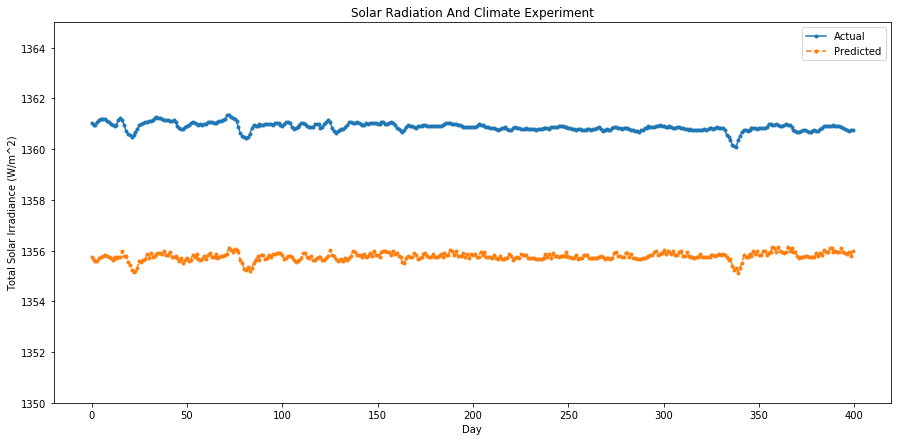

In [291]:
plt.figure(figsize=(15,7)) 
plt.ylim([1350,1365])
plt.plot(test1['tsi_1au (W/m^2)'].values[0:400],label='Actual',marker='.')
plt.plot(prediction[0:400],label='Predicted',linestyle='dashed',marker='.')
plt.xlabel('Day')
plt.ylabel('Total Solar Irradiance (W/m^2)')
plt.legend(loc='best')
plt.title('Solar Radiation And Climate Experiment')
plt.show()

In [313]:
from math import sqrt
error = sqrt(mean_squared_error(test1['tsi_1au (W/m^2)'].values[0:400], prediction))
print('Test RMSE: %.3f' % error)

Test RMSE: 5.108


#### 2.2 LSTM

In [129]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [146]:
# choose a number of time steps
n_steps = 10
# split into samples
train_X,train_y = split_sequence(train1['tsi_1au (W/m^2)'], n_steps)
test_X,test_y = split_sequence(test1['tsi_1au (W/m^2)'],n_steps)
print(train_X[0:5])
print(test_X[0:5])
train_X.shape

[[1361.4919    0.     1361.4594    0.        0.        0.        0.
     0.     1361.3077    0.    ]
 [   0.     1361.4594    0.        0.        0.        0.        0.
  1361.3077    0.     1361.3627]
 [1361.4594    0.        0.        0.        0.        0.     1361.3077
     0.     1361.3627 1361.3407]
 [   0.        0.        0.        0.        0.     1361.3077    0.
  1361.3627 1361.3407 1361.3395]
 [   0.        0.        0.        0.     1361.3077    0.     1361.3627
  1361.3407 1361.3395 1361.3523]]
[[1361.0357 1360.947  1360.9634 1361.0806 1361.1649 1361.2067 1361.198
  1361.1975 1361.1262 1361.0832]
 [1360.947  1360.9634 1361.0806 1361.1649 1361.2067 1361.198  1361.1975
  1361.1262 1361.0832 1360.9956]
 [1360.9634 1361.0806 1361.1649 1361.2067 1361.198  1361.1975 1361.1262
  1361.0832 1360.9956 1360.9367]
 [1361.0806 1361.1649 1361.2067 1361.198  1361.1975 1361.1262 1361.0832
  1360.9956 1360.9367 1360.9171]
 [1361.1649 1361.2067 1361.198  1361.1975 1361.1262 1361.0832 1360.

(4802, 10)

In [316]:
n_features=1
# define model
model =keras.Sequential()
model.add(keras.layers.LSTM(units=64, activation='relu', input_shape=(n_steps, n_features)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [317]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# fit model
model.fit(train_X, train_y, epochs=30, verbose=0)
# demonstrate prediction
test_X = test_X.reshape((len(test_X), n_steps, n_features))
yhat = model.predict(test_X, verbose=0)

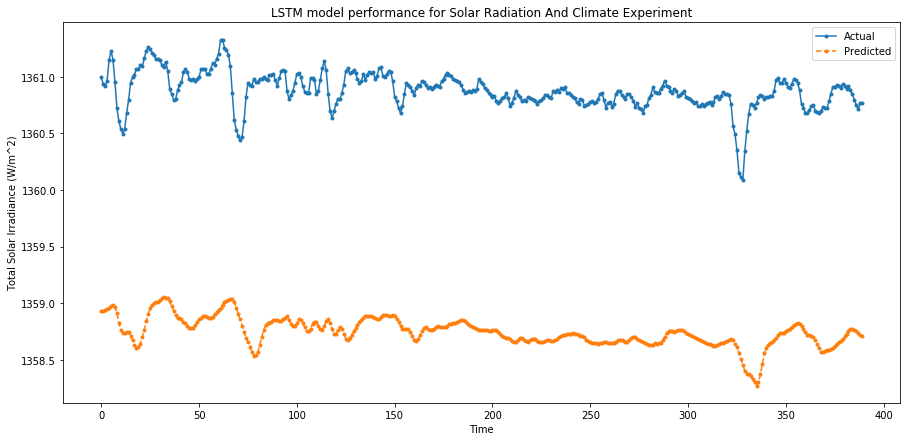

In [318]:
plt.figure(figsize=(15,7)) 
#plt.axis([1,700,1359.5,1362])
plt.plot(test_y,label='Actual',marker='.')
plt.plot(yhat,label='Predicted',linestyle='dashed',marker='.')
plt.xlabel('Time')
plt.ylabel('Total Solar Irradiance (W/m^2)')
plt.legend(loc='best')
plt.title('LSTM model performance for Solar Radiation And Climate Experiment')
plt.show()

In [319]:
rmse_lstm = sqrt(mean_squared_error(test_y,yhat))
print(f'The RMSE for LSTM is {rmse_lstm}')

The RMSE for LSTM is 2.1354623350079236


#### 2.3 AR model

In [345]:
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
# split dataset
X = data_sorce['tsi_1au (W/m^2)'].values
train, test = X[0:train_size1], X[train_size1:5212]

# train autoregression
model = AutoReg(train, lags=7)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))


Coefficients: [ 7.54942829e+01  8.34682304e-01  8.51056316e-02  7.55082303e-03
  1.82826010e-02 -6.94604293e-02  1.26722890e-02  5.23591925e-02]
predicted=1356.439933, expected=1361.035700
predicted=1352.644327, expected=1360.947000
predicted=1349.088294, expected=1360.963400
predicted=1345.770652, expected=1361.080600
predicted=1342.589099, expected=1361.164900
predicted=1339.867254, expected=1361.206700
predicted=1337.439766, expected=1361.198000
predicted=1335.058626, expected=1361.197500
predicted=1332.772465, expected=1361.126200
predicted=1330.586265, expected=1361.083200
predicted=1328.479591, expected=1360.995600
predicted=1326.441873, expected=1360.936700
predicted=1324.495550, expected=1360.917100
predicted=1322.643214, expected=1360.964700
predicted=1320.875765, expected=1361.150100
predicted=1319.189836, expected=1361.230800
predicted=1317.583008, expected=1361.150900
predicted=1316.050189, expected=1360.955000
predicted=1314.586285, expected=1360.728700
predicted=1313.1883

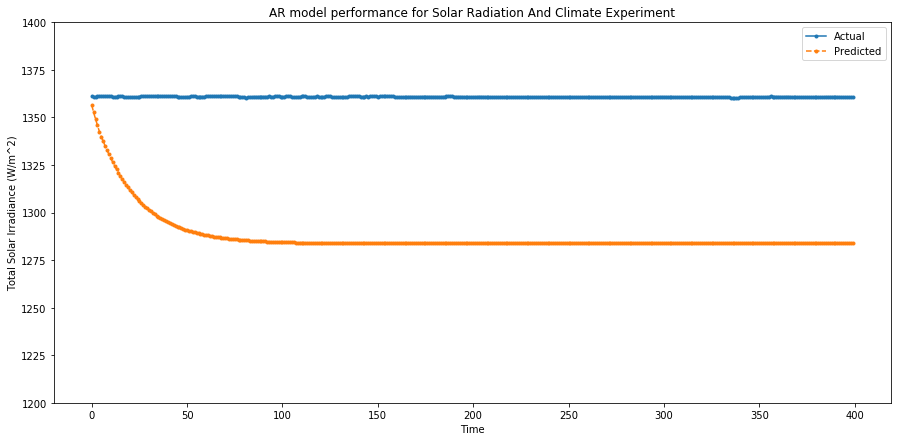

In [347]:
plt.figure(figsize=(15,7)) 
plt.ylim([1200,1400])
plt.plot(test,label='Actual',marker='.')
plt.plot(predictions,label='Predicted',linestyle='dashed',marker='.')
plt.xlabel('Time')
plt.ylabel('Total Solar Irradiance (W/m^2)')
plt.legend(loc='best')
plt.title('AR model performance for Solar Radiation And Climate Experiment')
plt.show()

In [346]:
rmse_ar = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse_ar)

Test RMSE: 74.070


#### 2.4 GPR

In [403]:
X_train=train1[['year','month','day']]
y_train= train1['tsi_1au (W/m^2)']
X_test = test1[['year','month','day']].head(400)
y_test = test1[['tsi_1au (W/m^2)']].head(400)

In [394]:
import sklearn.gaussian_process as gp

kernel = gp.kernels.ConstantKernel(1.0) * gp.kernels.RBF(0.1)

model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=0.1)
model.fit(X_train, y_train)
params = model.kernel_.get_params()

In [404]:
#Predictions
y_pred_gpr = model.predict(X_test)

In [405]:
y_test['Predictions'] = y_pred_gpr
y_test

,tsi_1au (W/m^2),Predictions
date,,
2016-04-29 12:00:00,1361.0357,1125.574908
2016-04-30 12:00:00,1360.9470,982.841864
2016-05-01 12:00:00,1360.9634,1042.824483
2016-05-02 12:00:00,1361.0806,1042.796357
2016-05-03 12:00:00,1361.1649,1042.698646
...,...,...
2017-05-29 12:00:00,1360.7973,170.599888
2017-05-30 12:00:00,1360.7493,113.608947
2017-05-31 12:00:00,1360.7122,106.860121


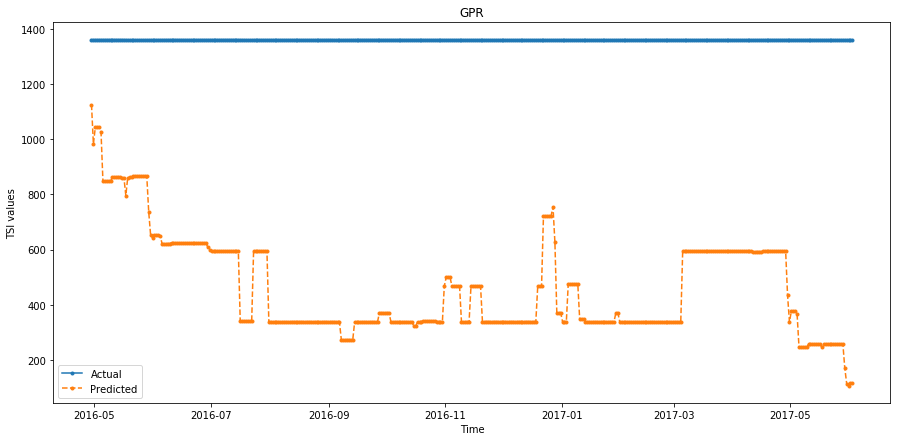

In [398]:
#plotting
plt.figure(figsize=(15,7))
#plt.ylim([400,1400])
plt.plot(y_test['tsi_1au (W/m^2)'],label='Actual',marker='.')
plt.plot(y_test['Predictions'],label='Predicted',marker='.',linestyle='dashed')
plt.title('GPR')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [406]:
RMSE = sqrt(mean_squared_error(y_test['tsi_1au (W/m^2)'], y_test['Predictions']))
RMSE

917.7388494700162

#### 2.5 VAR

In [364]:
from statsmodels.tsa.api import VAR
model = VAR(train1[['year','month','day','tsi_1au (W/m^2)']])
x = model.select_order(maxlags=35)
x.summary()

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,20.99,20.99,1.305e+09,20.99
1,-3.939,-3.912,0.01946,-3.930
2,-3.940,-3.891,0.01945,-3.923
3,-3.940,-3.869,0.01946,-3.915
4,-3.950,-3.858,0.01925,-3.918
5,-3.954,-3.840,0.01918,-3.914
6,-3.957,-3.821,0.01912,-3.909
7,-3.970,-3.813,0.01888,-3.915
8,-3.987,-3.808,0.01855,-3.924
9,-3.994,-3.793,0.01843,-3.923


In [365]:
model_fitted = model.fit(32)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 05, Sep, 2020
Time:                     00:39:52
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -6.19110
Nobs:                     4780.00    HQIC:                  -6.64434
Log likelihood:          -10147.5    FPE:                 0.00101820
AIC:                     -6.88977    Det(Omega_mle):     0.000915318
--------------------------------------------------------------------
Results for equation year
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -4.494458         0.623866           -7.204           0.000
L1.year                    39.246291         3.471211           11.306           0.000
L1.month                    3.187855 

In [366]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input =train1[['year','month','day','tsi_1au (W/m^2)']].values[-lag_order:]
#forecast_input

32


In [377]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=400)
df_forecast = pd.DataFrame(fc, index=test1[['year','month','day','tsi_1au (W/m^2)']].head(400).index[-400:],columns=['year','month','day','tsi_1au (W/m^2)'])
df_forecast

,year,month,day,tsi_1au (W/m^2)
date,,,,
2016-04-29 12:00:00,2015.995970,4.155426,25.993031,1353.654098
2016-04-30 12:00:00,2015.990159,4.272268,25.636499,1352.629992
2016-05-01 12:00:00,2015.985971,4.884273,9.796405,1339.179187
2016-05-02 12:00:00,2016.040533,4.527177,1.581803,1339.163189
2016-05-03 12:00:00,2016.037418,4.562582,2.650048,1361.268367
...,...,...,...,...
2017-05-29 12:00:00,2016.912274,6.189683,25.274169,1168.860070
2017-05-30 12:00:00,2016.922284,6.208173,22.077492,1163.412107
2017-05-31 12:00:00,2016.936684,6.221154,17.430106,1159.768216


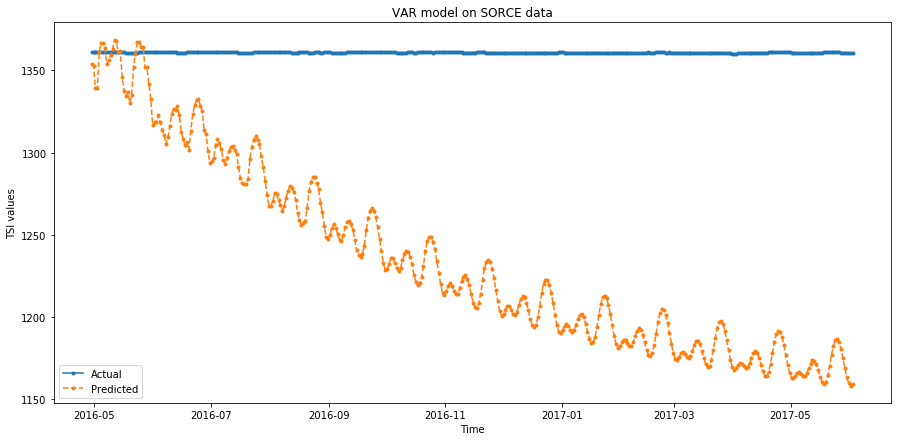

In [375]:
#plotting
plt.figure(figsize=(15,7))
plt.plot(test1['tsi_1au (W/m^2)'].head(400),label='Actual',marker='.')
plt.plot(df_forecast['tsi_1au (W/m^2)'],label='Predicted',marker='.',linestyle='dashed')
plt.title('VAR model on SORCE data')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [378]:
#Calculating root mean squared error
rmse_var = sqrt(mean_squared_error(test1['tsi_1au (W/m^2)'].head(400), df_forecast['tsi_1au (W/m^2)']))
print('RMSE: %f' % rmse_var)

RMSE: 138.422546


#### 2.6 Bidirectional LSTM

In [157]:
n_features=1
# Bidirectional LSTM model
model =keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(400), merge_mode='concat', input_shape=(n_steps, n_features)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [158]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# fit model
model.fit(train_X, train_y, epochs=40, verbose=0)
# demonstrate prediction
test_X = test_X.reshape((len(test_X), n_steps, n_features))
yhat = model.predict(test_X, verbose=0)

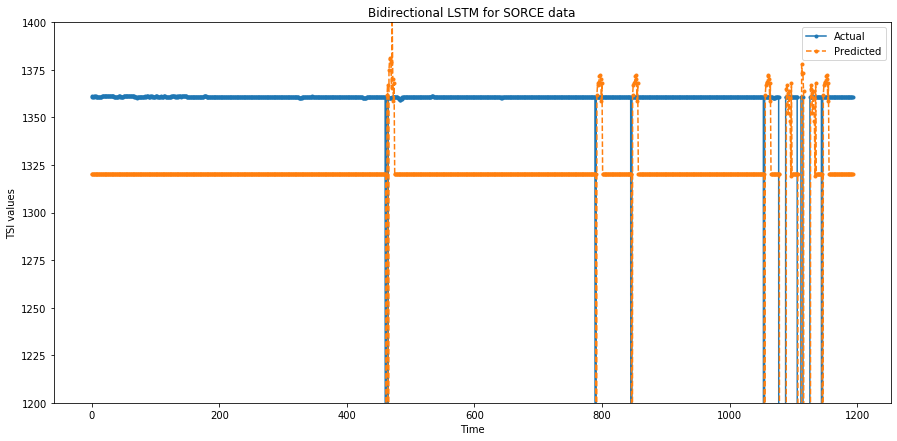

In [164]:
#plotting
plt.figure(figsize=(15,7))
plt.ylim([1200,1400])
plt.plot(test_y,label='Actual',marker='.')
plt.plot(yhat,label='Predicted',marker='.',linestyle='dashed')
plt.title('Bidirectional LSTM for SORCE data')
plt.xlabel('Time')
plt.ylabel('TSI values')
plt.legend(loc='best')
plt.show()

In [161]:
rmse_bi_lstm = sqrt(mean_squared_error(test_y[0:400],yhat[0:400]))
print(f'The RMSE for LSTM is {rmse_bi_lstm}')

The RMSE for LSTM is 40.75765899859017


#### Cascaded bidirectional and unidirectional LSTM model

In [172]:
# Cascaded bidirectional and unidirectional model
model =keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True),merge_mode='concat'))
model.add(keras.layers.LSTM(400,input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [173]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# fit model
model.fit(train_X, train_y, epochs=40, verbose=0)
# demonstrate prediction
test_X = test_X.reshape((len(test_X), n_steps, n_features))
yhat = model.predict(test_X, verbose=0)

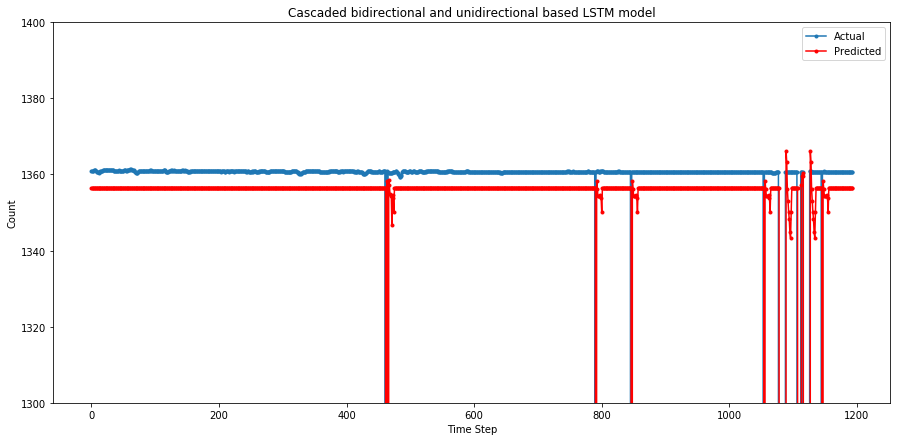

In [176]:
#plotting actual vs predicted values
plt.figure(figsize=(15,7))
plt.ylim([1300,1400])
plt.plot(test_y,marker='.',label='Actual')
plt.plot(yhat,marker='.',label='Predicted',color='red')
plt.title('Cascaded bidirectional and unidirectional based LSTM model')
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [177]:
from math import sqrt
rmse_cas_lstm = sqrt(mean_squared_error(test_y[0:400],yhat[0:400]))
print('Test RMSE: %.3f' % rmse_cas_lstm)

Test RMSE: 4.494


## Performance of various ML models

#### 1. TCTE data

Models             |     RMSE       |
------------------:|---------------:| 
ARIMA              |       232.572  |     
LSTM               |       154.494  |
AR                 |       151.056  |
VAR                |       151.072  |
GPR                |       151.056  |
Bidirectional LSTM |       152.380  |
Cascaded bidirectional and unidirectional based LSTM | 151.304 |

Models             | RMSE    |
-----------------: |--------:| 
ARIMA              | 5.108   |     
LSTM               | 2.135   |
AR                 | 74.070  |
VAR                | 138.423 |
GPR                | 917.738 |
Bidirectional LSTM | 40.757  |
Cascaded bidirectional and unidirectional based LSTM | 4.494 |

> __*Root Mean Square Error (RMSE)*__ is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit.

> From the aboove table, it can be seen that for __*TCTE data*__ __, AR model and GPR model__ performed well among all the other models with a RMSE value of 151.056.
 Whereas, for __*SORCE data*__, it can be seen that unidirectional __LSTM model__ performed better with 64 hidden units, relu activation, 30 epochs and RMSE value of 2.135 followed by __Cascaded bidirectional and unidirectional based LSTM__ with 64 bidirectional layers with concatenated output values, 400 unidirectional layers and relu activation with RMSE value of 4.494 